# Mama Tee restaurant Tip   Model
## by  Gift  Ahmed

### Step #1 Importing the required libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn
import sklearn

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

### Step#2 Loading the dataset

In [2]:

df = pd.read_csv("data/tips.csv") #importing  dataset 

df.head()

,total_bill,tip,gender,smoker,day,time,size
0,2125.50,360.79,Male,No,Thur,Lunch,1
1,2727.18,259.42,Female,No,Sun,Dinner,5
2,1066.02,274.68,Female,Yes,Thur,Dinner,4
3,3493.45,337.90,Female,No,Sun,Dinner,1
4,3470.56,567.89,Male,Yes,Sun,Lunch,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  744 non-null    float64
 1   tip         744 non-null    float64
 2   gender      744 non-null    object 
 3   smoker      744 non-null    object 
 4   day         744 non-null    object 
 5   time        744 non-null    object 
 6   size        744 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 40.8+ KB


In [4]:
df.describe()

,total_bill,tip,size
count,744.000000,744.000000,744.000000
mean,2165.006640,325.948091,3.180108
std,954.248806,148.778225,1.532890
min,44.690000,0.000000,1.000000
25%,1499.022500,218.000000,2.000000
50%,2102.610000,320.460000,3.000000
75%,2743.802500,415.562500,4.000000
max,5538.290000,1090.000000,6.000000


### Step#3 Clean the dataset

In [5]:
df.columns

Index(['total_bill', 'tip', 'gender', 'smoker', 'day', 'time', 'size'], dtype='object')

In [6]:
# Check for missing value
df.isnull().sum()

total_bill    0
tip           0
gender        0
smoker        0
day           0
time          0
size          0
dtype: int64

In [7]:
# # fill up missing values in Distance_Km will the mean
# mean_value = df[""].mean() #TODO: add the column name with missing values
# print(mean_value)

# df[""].fillna(mean_value, inplace=True)

In [8]:
# Check and make sure all missing valuen have been filled
df.isnull().sum()

total_bill    0
tip           0
gender        0
smoker        0
day           0
time          0
size          0
dtype: int64

### Step#4 Perform data segmentation

In [9]:
y = df["tip"] # TODO: Add Target name
X = df.drop("tip", axis=1) # TODO: Add Target name

In [10]:
# Convert categorical features using OneHotEncoding
X = pd.get_dummies(X, drop_first=True)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

### Step#5 Load your data into the Linear Regression model i.e Train your model

In [12]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train) #TODO: Train your model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Step#6 Make predictions

In [13]:
reg.predict(X_test) ## Predict

array([284.93390775, 352.64547677, 304.31140983, 372.63469626,
       257.47764952, 329.17529311, 277.16221544, 360.51361322,
       386.3372227 , 294.13324496, 337.81851363, 268.04706804,
       283.70460701, 270.71919725, 285.78008631, 370.26465449,
       233.65022922, 288.75823123, 350.65994414, 312.52757514,
       316.39039668, 326.51410202, 326.88451523, 340.4913748 ,
       282.09726182, 316.77743163, 333.43430841, 293.08556481,
       270.02811104, 282.00729413, 362.68752764, 345.65683226,
       333.1245882 , 322.27061817, 273.66893879, 309.22637724,
       349.8130061 , 285.44005905, 243.3317666 , 407.06560164,
       270.13335865, 297.75368064, 330.54232727, 383.83903682,
       325.2475132 , 337.86608254, 327.57439039, 324.7102521 ,
       287.73004508, 327.37002121, 301.73904689, 244.70997485,
       328.72311852, 231.97824331, 306.37408264, 325.58667981,
       376.90065057, 368.09662001, 265.18567916, 367.55288507,
       341.50720543, 298.65662721, 274.55031869, 377.10

## Step#7 Evaluate your model

In [14]:
from sklearn.metrics import mean_absolute_error

# TODO: Evaluate your model using the following
# - R Square/Adjusted R Square
# - Mean Square Error(MSE)/Root Mean Square Error(RMSE)
# - Mean Absolute Error(MAE)

y_pred = reg.predict(X_test)

print("MAE",mean_absolute_error(y_test,y_pred))

MAE 118.89702992837498


# Other Machine Learning Algorithms

In [15]:
 # TODO: Try another Machine Learning Algorithms

In [16]:
from sklearn.tree import DecisionTreeRegressor

In [17]:
# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [18]:
print("MAE",mean_absolute_error(y_test,y_pred_dt))

MAE 149.52464285714288


In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
# Random Forest
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [21]:
print("MAE",mean_absolute_error(y_test,y_pred_rf))

MAE 120.50495000000001


In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [23]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "Random Forest"],
    "MAE": [
        mean_absolute_error(y_test, y_pred),
        mean_absolute_error(y_test, y_pred_dt),
        mean_absolute_error(y_test, y_pred_rf)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred)),
        np.sqrt(mean_squared_error(y_test, y_pred_dt)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf))
    ],
    "R2 Score": [
        r2_score(y_test, y_pred),
        r2_score(y_test, y_pred_dt),
        r2_score(y_test, y_pred_rf)
    ]
})

print("\n===== Model Comparison Table =====")
print(results)



===== Model Comparison Table =====
               Model         MAE        RMSE  R2 Score
0  Linear Regression  118.897030  151.220741  0.015844
1      Decision Tree  149.524643  199.897517 -0.719713
2      Random Forest  120.504950  154.852847 -0.031999


In [24]:
import matplotlib.pyplot as plt

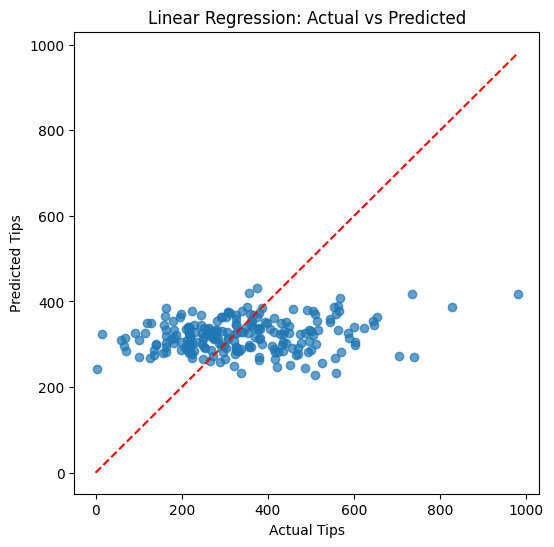

In [25]:
# ================================================================
# Step #10 Visualize predictions
# ================================================================

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Tips")
plt.ylabel("Predicted Tips")
plt.title("Linear Regression: Actual vs Predicted")
plt.plot([0, max(y_test)], [0, max(y_test)], 'r--')
plt.show()

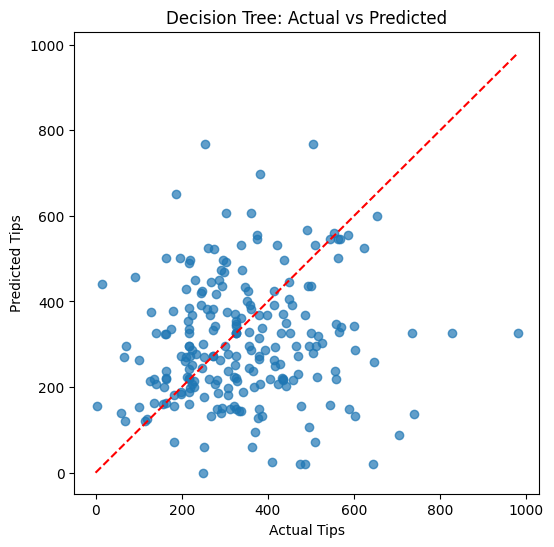

In [26]:
# ================================================================
# Step #11 Visualize predictions
# ================================================================

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_dt, alpha=0.7)
plt.xlabel("Actual Tips")
plt.ylabel("Predicted Tips")
plt.title("Decision Tree: Actual vs Predicted")
plt.plot([0, max(y_test)], [0, max(y_test)], 'r--')
plt.show()

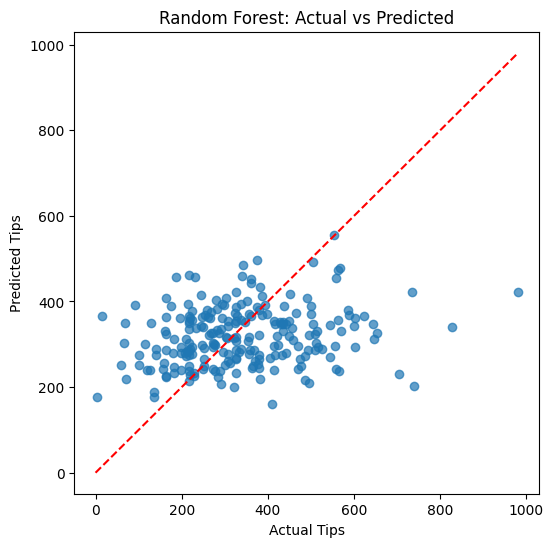

In [27]:
# ================================================================
# Step #11 Visualize predictions
# ================================================================

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.xlabel("Actual Tips")
plt.ylabel("Predicted Tips")
plt.title("Random Forest: Actual vs Predicted")
plt.plot([0, max(y_test)], [0, max(y_test)], 'r--')
plt.show()

In [28]:
import pickle

In [29]:
# Save model
with open("tip.pkl", "wb") as f:
    pickle.dump(reg, f)

print("✅ Model trained and saved as model.pkl")

✅ Model trained and saved as model.pkl
